<a href="https://colab.research.google.com/github/Amrutha123BS/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PlayStore_df = pd.read_csv("/content/drive/MyDrive/Almabetter/CAPSTONE PROJECT_EDA/Play Store Data.csv")
UR_df = pd.read_csv("/content/drive/MyDrive/Almabetter/CAPSTONE PROJECT_EDA/User Reviews.csv")

# Lets Explore PlayStore DataFrame

In [5]:
PlayStore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
rows = PlayStore_df.shape[0]
column = PlayStore_df.shape[1]
#print('There are {} Rows and {} Columns in the dataset'.format(rows, column)).............?
print(f'There are {rows} Rows and {column} Columns in the dataset')

There are 10841 Rows and 13 Columns in the dataset


In [8]:
# Lets see the head and tail of PlayStore dataframe together by concatinating both.

PS_new_df  = pd.concat([PlayStore_df.head(),PlayStore_df.tail()])
PS_new_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [11]:
PlayStore_df.dtypes 

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
PlayStore_df.describe() # since we have only rating as numeric column in the PlayStore DataFrame.

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
PlayStore_df.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
PlayStore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

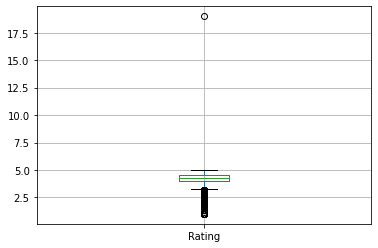

In [15]:
PlayStore_df.boxplot() # since we have only rating as numeric, the boxplot is taking rating column.
# From the Output below we can infer that in the rating column we have one outlier.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faea7655690>]],
      dtype=object)

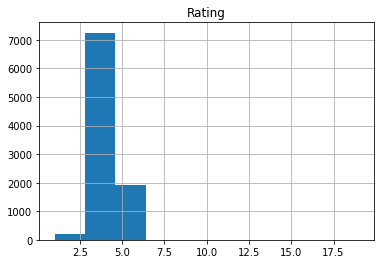

In [16]:
PlayStore_df.hist() # outlier of the rating affected the histogram.

## FINDING UNIQUE VALUES

In [ ]:
#len(list(Play_df.App.unique())) # (10,841 - 9660 = 1,181 ) 9660 values are unique
#len(list(Play_df.Category.unique())) # 34 unique values
#len(list(Play_df.Rating.unique())) # 41..................
#len(list(Play_df.Reviews.unique())) # 6002
#len(list(Play_df.Size.unique())) # 462
#len(list(Play_df.Installs.unique())) #22
#len(list(Play_df.Type.unique())) #4.............
#len(list(Play_df.Price.unique())) #93
#len(list(Play_df["Content Rating"].unique())) #7......
#len(list(Play_df.Genres.unique())) #120
#len(list(Play_df["Last Updated"].unique())) #1378
#len(list(Play_df["Current Ver"].unique())) #2833..........
#len(list(Play_df["Android Ver"].unique())) #34.........

In [17]:
PlayStore_df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

# Finding null values

In [18]:
# How many Null Values are there in each column of the PlayStore DataFrame?

PlayStore_df.isnull().sum() 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [19]:
# Lets check whether we have NAN values in more than 2 values in each row. 

PlayStore_df.dropna(subset=["Rating","Type","Content Rating","Current Ver","Android Ver"],how="all").shape

# since the shape of the output remains as original that means we dont have any rows where all of this values are NAN.

(10841, 13)

In [20]:
# Total NaN values in the Df

PlayStore_df.isnull().sum().sum() # 10841-1487 = 9354 

1487

# Checking for those columns which has Null Values

In [21]:
PlayStore_df[PlayStore_df["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [22]:
PlayStore_df[PlayStore_df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [23]:
PlayStore_df[PlayStore_df["Content Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [24]:
PlayStore_df[PlayStore_df["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [25]:
PlayStore_df[PlayStore_df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# DATA CLEANING and DATA IMPUTATION and MANIPULATION

In [27]:
# If any columns have 90% ofthe data missing then we can drop that column. 

print(len(PlayStore_df)*0.9) # 90% of data will be 9756 

PlayStore_df.isnull().sum() # From this we can infer that no columns has 9756 NaN values 

# so we need not to Drop any Columns in this DataFrame.

9756.9


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### LETS CHECK FOR all columns in the DF

In [28]:
PlayStore_df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

##Category and Rating columns

In [29]:
PlayStore_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [30]:
# '1.9' is wrong value. So I have to see in which rows '1.9' corresponds to.
PlayStore_df[PlayStore_df['Category']== "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [31]:
PlayStore_df[PlayStore_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [32]:
PlayStore_df.drop([10472],inplace = True) # by this we have dropped the outliers of Rating column as well as noise of Category column( which is "1.9")

In [33]:
PlayStore_df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


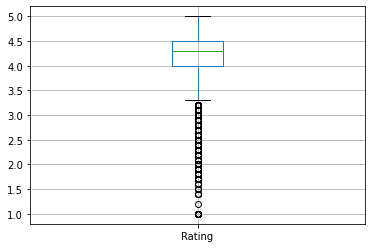

In [34]:
PlayStore_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faea70e0590>]],
      dtype=object)

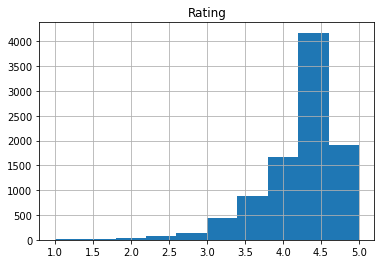

In [35]:
PlayStore_df.hist()

In [36]:
PlayStore_df['Rating'].unique() # we Have one NaN Value here? What should we do with this?

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [37]:
# THINK ABOUT CAN WE IMPUTE MEDIAN VALUES?
# or Zeros?

# Defining the function to fill the null values with the median.
# def impute_median(series):
#   return series.fillna(series.median())

# play_store.Rating = play_store['Rating'].transform(impute_median)


In [38]:
print(PlayStore_df['Type'].unique())
print(PlayStore_df['Current Ver'].unique())
print(PlayStore_df['Android Ver'].unique())

['Free' 'Paid' nan]
['1.0.0' '2.0.0' '1.2.4' ... '1.0.612928' '0.3.4' '2.0.148.0']
['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '2.3.3 and up' 'Varies with device'
 '2.2 and up' '5.0 and up' '6.0 and up' '1.6 and up' '1.5 and up'
 '2.1 and up' '7.0 and up' '5.1 and up' '4.3 and up' '4.0.3 - 7.1.1'
 '2.0 and up' '3.2 and up' '4.4W and up' '7.1 and up' '7.0 - 7.1.1'
 '8.0 and up' '5.0 - 8.0' '3.1 and up' '2.0.1 and up' '4.1 - 7.1.1' nan
 '5.0 - 6.0' '1.0 and up' '2.2 - 7.1.1' '5.0 - 7.1.1']


In [39]:
# Mode of categorical values
print(PlayStore_df['Type'].mode())
print(PlayStore_df['Current Ver'].mode())
print(PlayStore_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [40]:
# Filling the missing categorical values with Mode
PlayStore_df['Type'].fillna(str(PlayStore_df['Type'].mode().values[0]),inplace=True)
PlayStore_df['Current Ver'].fillna(str(PlayStore_df['Current Ver'].mode().values[0]),inplace=True)
PlayStore_df['Android Ver'].fillna(str(PlayStore_df['Android Ver'].mode().values[0]),inplace=True)

In [41]:
PlayStore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [42]:
PlayStore_df["Price"].unique() # We have 92 Unique values

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [43]:
# Converting Price into numerical values
PlayStore_df['Price'] = PlayStore_df['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
PlayStore_df['Price'] = PlayStore_df['Price'].apply(lambda x : float(x))

In [44]:
PlayStore_df["Reviews"].unique() # We have 6001 Unique values and we dont know whether do we have any noise.

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [45]:
# lets convert Reviews to numeric type and noise to NaN values by using errors = "coerce" in pd.to_numeric.
PlayStore_df['Reviews'] = pd.to_numeric(PlayStore_df['Reviews'],errors='coerce')

In [46]:
PlayStore_df["Installs"].unique() # 21 unique values and we have noise like "+" so we need to remove it.

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [47]:
# Convert Installs to numeric and remove noise.

PlayStore_df['Installs'] = PlayStore_df['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
PlayStore_df['Installs'] = PlayStore_df['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
PlayStore_df['Installs'] = PlayStore_df['Installs'].apply(lambda x : float(x))

In [48]:
PlayStore_df["Installs"].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [49]:
PlayStore_df["Size"].unique() # 461 unique values and one noise = Varies with device

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [50]:
# In the Size column "M"- indicating MB and "k"- KB hence replace "M" with 000000 and "k" with 000 for our ease and analysis purpose.

PlayStore_df['Size'] = PlayStore_df.Size.str.replace("M","000000")
PlayStore_df['Size'] = PlayStore_df.Size.str.replace("k","000")
#play_store['Size'] = play_store.Size.replace("1,000+",1000).............??

In [51]:
pd.to_numeric(PlayStore_df['Size'],errors='coerce') # coerce has to convert noise to NaN but it is not ? why?
PlayStore_df["Size"].unique()

array(['19000000', '14000000', '8.7000000', '25000000', '2.8000000',
       '5.6000000', '29000000', '33000000', '3.1000000', '28000000',
       '12000000', '20000000', '21000000', '37000000', '2.7000000',
       '5.5000000', '17000000', '39000000', '31000000', '4.2000000',
       '7.0000000', '23000000', '6.0000000', '6.1000000', '4.6000000',
       '9.2000000', '5.2000000', '11000000', '24000000',
       'Varies with device', '9.4000000', '15000000', '10000000',
       '1.2000000', '26000000', '8.0000000', '7.9000000', '56000000',
       '57000000', '35000000', '54000000', '201000', '3.6000000',
       '5.7000000', '8.6000000', '2.4000000', '27000000', '2.5000000',
       '16000000', '3.4000000', '8.9000000', '3.9000000', '2.9000000',
       '38000000', '32000000', '5.4000000', '18000000', '1.1000000',
       '2.2000000', '4.5000000', '9.8000000', '52000000', '9.0000000',
       '6.7000000', '30000000', '2.6000000', '7.1000000', '3.7000000',
       '22000000', '7.4000000', '6.4000000

In [52]:
# since coerce is not working we are manually converting noise to null and converting Size to flaot(numeric)

PlayStore_df['Size'] = PlayStore_df.Size.replace("Varies with device",np.nan)
PlayStore_df['Size'] =PlayStore_df['Size'].astype(float)

In [53]:
PlayStore_df['Last Updated'].unique() 

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [54]:
#Data type of Last Uptated is object. I converted from string to date type.

PlayStore_df['Last Updated'] = pd.to_datetime(PlayStore_df['Last Updated'])
PlayStore_df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [55]:
PlayStore_df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [56]:
PlayStore_df.describe(include="all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10840,10840,9366.000000,1.084000e+04,9.145000e+03,1.084000e+04,10840,10840.000000,10840,10840,10840,10840,10840
unique,9659,33,NaN,NaN,NaN,NaN,2,NaN,6,119,1377,2831,33
top,ROBLOX,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools,2018-08-03 00:00:00,Varies with device,4.1 and up
freq,9,1972,NaN,NaN,NaN,NaN,10040,NaN,8714,842,326,1467,2453
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-05-21 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-08 00:00:00,NaN,NaN
mean,NaN,NaN,4.191757,4.441529e+05,1.957748e+07,1.546434e+07,NaN,1.027368,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.515219,2.927761e+06,2.404364e+07,8.502936e+07,NaN,15.949703,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,1.000000e+00,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,3.800000e+01,5.600000e+00,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [57]:
UR_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [58]:
UR_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [59]:
UR_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

#number of UNIQUE VALUES OF EACH COLUMN

In [60]:
UR_df.nunique()

App                        1074
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         6195
Sentiment_Subjectivity     4530
dtype: int64

#How many null values are there in each column

In [61]:
UR_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

# HOW TO HANDLE MISSING VALUES

In [62]:
UR_df.dropna().shape # this will drop all the rows where even if any one of the column is having null value.

(37427, 5)

In [63]:
UR_df.dropna(how="all").shape # if all the columns/values of that particular row has null values drop those rows.

(64295, 5)

In [64]:
New_UR_df1 = UR_df.dropna(subset=["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"],how="all")

In [65]:
New_UR_df1.shape

(37432, 5)

In [66]:
New_UR_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37432 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37432 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [67]:
New_UR_df1.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [68]:
New_UR_df1[New_UR_df1.Translated_Review.isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [69]:
New_R_df2= New_UR_df1.fillna(value= "value_not_found")

In [70]:
New_R_df2.loc[250:270]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
250,11st,forced full screen popups,Positive,0.025000,0.375000
251,11st,Is it sound like you want to clear Chrome and ...,Positive,0.283333,0.477778
252,11st,Ok,Positive,0.500000,0.500000
253,11st,I am trying to update every time but I do not ...,Negative,-0.308333,0.458333
254,11st,Just try.. So far good,Positive,0.400000,0.800000
255,11st,Icon name is strange after updating,Negative,-0.050000,0.150000
256,11st,com.skplanet.syruppay.cardrecognizedlib,Neutral,0.000000,0.000000
257,11st,Nice,Positive,0.600000,1.000000
258,11st,best shop,Positive,1.000000,0.300000
259,11st,I forgot password can't get new,Positive,0.136364,0.454545


In [71]:
New_R_df2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [72]:
New_R_df2.shape

(37432, 5)

In [73]:
# pdf = PlayStore_df
# pdf["Type"] = PlayStore_df['Type'].fillna(str(PlayStore_df['Type'].mode()[0]))
#pdf["Type"].value_counts()
PlayStore_df["Type"].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

In [74]:
PlayStore_df.App.unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [75]:
UR_df.App.unique()

array(['10 Best Foods for You', '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
       '11st', ..., 'Hotwire Hotel & Car Rental App',
       'Housing-Real Estate & Property', 'Houzz Interior Design Ideas'],
      dtype=object)

In [76]:
UR_df[UR_df["App"]=="Photo Editor & Candy Camera & Grid & ScrapBook"]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


In [77]:
PlayStore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000000.0,10000000.0,Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


In [78]:
# Lets Merge two DataFrame to check the common apps 
psc_df = PlayStore_df.copy()
urc_df = New_UR_df1.copy()

In [79]:
psc_df.App.nunique()

9659

In [80]:
urc_df.App.nunique()

865

In [81]:
innerjoin = pd.merge(psc_df, urc_df, how='inner', left_on='App', right_on='App')

In [82]:
innerjoin.isnull().sum() # we have Null values in Rating and Translated Review columns.

App                           0
Category                      0
Rating                       39
Reviews                       0
Size                      27566
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review            10
Sentiment                     0
Sentiment_Polarity            0
Sentiment_Subjectivity        0
dtype: int64

In [83]:
innerjoin[innerjoin.Rating.isnull()] # sentiment - 10% are -ve and 10% are neutral 80% are +ve.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
47881,Blood Pressure,MEDICAL,NaN,10,2.4,1000.0,Free,0.0,Everyone,Medical,2015-03-14,1.0,2.3 and up,Have used years great success. Easy & fast. Lo...,Positive,0.488889,0.563889
47882,Blood Pressure,MEDICAL,NaN,10,2.4,1000.0,Free,0.0,Everyone,Medical,2015-03-14,1.0,2.3 and up,I like shows blood pressure good level also hi...,Positive,0.286667,0.480000
47883,Blood Pressure,MEDICAL,NaN,10,2.4,1000.0,Free,0.0,Everyone,Medical,2015-03-14,1.0,2.3 and up,Really helps track pressure allows write note ...,Positive,0.100000,0.300000
47884,Blood Pressure,MEDICAL,NaN,10,2.4,1000.0,Free,0.0,Everyone,Medical,2015-03-14,1.0,2.3 and up,The best Blood Pressure Android...... My Docto...,Positive,1.000000,0.650000
47885,Blood Pressure,MEDICAL,NaN,10,2.4,1000.0,Free,0.0,Everyone,Medical,2015-03-14,1.0,2.3 and up,Very helpful many useful features. Particularl...,Positive,0.291667,0.283333
47886,Blood Pressure,MEDICAL,NaN,10,2.4,1000.0,Free,0.0,Everyone,Medical,2015-03-14,1.0,2.3 and up,Doesn't work.,Neutral,0.000000,0.000000
47887,Blood Pressure,MEDICAL,NaN,10,2.4,1000.0,Free,0.0,Everyone,Medical,2015-03-14,1.0,2.3 and up,Just 3 weeks far happy..,Positive,0.450000,1.000000
47888,Blood Pressure,MEDICAL,NaN,10,2.4,1000.0,Free,0.0,Everyone,Medical,2015-03-14,1.0,2.3 and up,Great tracking blood pressure readings. Love e...,Positive,0.650000,0.675000
47889,Blood Pressure,MEDICAL,NaN,10,2.4,1000.0,Free,0.0,Everyone,Medical,2015-03-14,1.0,2.3 and up,Nice UI. Easy enter data.,Positive,0.516667,0.916667
47890,Blood Pressure,MEDICAL,NaN,10,2.4,1000.0,Free,0.0,Everyone,Medical,2015-03-14,1.0,2.3 and up,Easy helpful,Positive,0.433333,0.833333


In [84]:
innerjoin[innerjoin["Translated_Review"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
4155,DC Comics,COMICS,4.2,25671,NaN,1000000.0,Free,0.0,Teen,Comics,2018-06-05,Varies with device,Varies with device,NaN,Neutral,0.0,0.0
4191,DC Comics,COMICS,4.2,25673,NaN,1000000.0,Free,0.0,Teen,Comics,2018-06-05,Varies with device,Varies with device,NaN,Neutral,0.0,0.0
17998,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.6,1873516,NaN,50000000.0,Free,0.0,Everyone,Health & Fitness,2018-07-31,Varies with device,Varies with device,NaN,Neutral,0.0,0.0
18253,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.6,1873523,NaN,50000000.0,Free,0.0,Everyone,Health & Fitness,2018-07-31,Varies with device,Varies with device,NaN,Neutral,0.0,0.0
18508,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.6,1873520,NaN,50000000.0,Free,0.0,Everyone,Health & Fitness,2018-07-31,Varies with device,Varies with device,NaN,Neutral,0.0,0.0
18763,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.6,1873520,NaN,50000000.0,Free,0.0,Everyone,Health & Fitness,2018-07-31,Varies with device,Varies with device,NaN,Neutral,0.0,0.0
19018,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.6,1873523,NaN,50000000.0,Free,0.0,Everyone,Health & Fitness,2018-07-31,Varies with device,Varies with device,NaN,Neutral,0.0,0.0
51586,11st,SHOPPING,3.8,48732,20000000.0,10000000.0,Free,0.0,Everyone,Shopping,2018-07-31,7.8.1,4.0 and up,NaN,Neutral,0.0,0.0
54166,Garden Photo Frames - Garden Photo Editor,PHOTOGRAPHY,4.4,1864,13000000.0,500000.0,Free,0.0,Everyone,Photography,2018-05-03,22.0,4.0.3 and up,NaN,Neutral,0.0,0.0
63650,Birds Sounds Ringtones & Wallpapers,PERSONALIZATION,4.6,5073,23000000.0,1000000.0,Free,0.0,Everyone 10+,Personalization,2017-09-25,1.1,4.0 and up,NaN,Neutral,0.0,0.0


In [86]:
PlayStore_df[PlayStore_df["Rating"].isnull() & PlayStore_df["Category"].str.contains("MEDICAL") & PlayStore_df["App"].str.contains("Blood Pressure")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2356,Free Blood Pressure,MEDICAL,NaN,7,5.7,5000.0,Free,0.0,Everyone,Medical,2016-10-13,3.0.0,4.0.3 and up
2502,Free Blood Pressure,MEDICAL,NaN,7,5.7,5000.0,Free,0.0,Everyone,Medical,2016-10-13,3.0.0,4.0.3 and up
2513,Blood Pressure,MEDICAL,NaN,10,2.4,1000.0,Free,0.0,Everyone,Medical,2015-03-14,1.0,2.3 and up
6598,Free Blood Pressure,MEDICAL,NaN,7,5.7,5000.0,Free,0.0,Everyone,Medical,2016-10-13,3.0.0,4.0.3 and up


In [87]:
PlayStore_df.Rating.mode() # We have Translated reviews for NaN rating only for App Blood Pressure (2513 rows) what shoould we do with other NaN values of rating column

0    4.4
dtype: float64

In [88]:
PlayStore_df[PlayStore_df["Rating"].isnull()]["Category"].unique()

array(['ART_AND_DESIGN', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS',
       'COMICS', 'DATING', 'EDUCATION', 'EVENTS', 'FOOD_AND_DRINK',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'FAMILY', 'MEDICAL',
       'TOOLS', 'PARENTING', 'VIDEO_PLAYERS', 'PERSONALIZATION', 'GAME',
       'PHOTOGRAPHY', 'SOCIAL', 'SPORTS', 'COMMUNICATION', 'PRODUCTIVITY',
       'AUTO_AND_VEHICLES', 'FINANCE', 'LIFESTYLE', 'TRAVEL_AND_LOCAL',
       'SHOPPING', 'HEALTH_AND_FITNESS', 'WEATHER', 'NEWS_AND_MAGAZINES',
       'MAPS_AND_NAVIGATION'], dtype=object)

In [89]:
PlayStore_df[PlayStore_df["Rating"].isnull()].groupby(["Category"])["App"].count()

Category
ART_AND_DESIGN           3
AUTO_AND_VEHICLES       12
BEAUTY                  11
BOOKS_AND_REFERENCE     53
BUSINESS               157
COMICS                   2
COMMUNICATION           59
DATING                  39
EDUCATION                1
EVENTS                  19
FAMILY                 225
FINANCE                 43
FOOD_AND_DRINK          18
GAME                    47
HEALTH_AND_FITNESS      44
HOUSE_AND_HOME          12
LIBRARIES_AND_DEMO      20
LIFESTYLE               68
MAPS_AND_NAVIGATION     13
MEDICAL                113
NEWS_AND_MAGAZINES      50
PARENTING               10
PERSONALIZATION         78
PHOTOGRAPHY             18
PRODUCTIVITY            73
SHOPPING                22
SOCIAL                  36
SPORTS                  65
TOOLS                  109
TRAVEL_AND_LOCAL        32
VIDEO_PLAYERS           15
WEATHER                  7
Name: App, dtype: int64

In [90]:
PlayStore_df.groupby(["Category"])["App"].nunique()

Category
ART_AND_DESIGN           64
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     222
BUSINESS                420
COMICS                   56
COMMUNICATION           316
DATING                  171
EDUCATION               119
ENTERTAINMENT           102
EVENTS                   64
FAMILY                 1909
FINANCE                 345
FOOD_AND_DRINK          112
GAME                    960
HEALTH_AND_FITNESS      288
HOUSE_AND_HOME           74
LIBRARIES_AND_DEMO       84
LIFESTYLE               369
MAPS_AND_NAVIGATION     131
MEDICAL                 396
NEWS_AND_MAGAZINES      254
PARENTING                60
PERSONALIZATION         376
PHOTOGRAPHY             281
PRODUCTIVITY            374
SHOPPING                202
SOCIAL                  239
SPORTS                  327
TOOLS                   829
TRAVEL_AND_LOCAL        219
VIDEO_PLAYERS           164
WEATHER                  79
Name: App, dtype: int64

In [91]:
PlayStore_df.groupby(["Category"])["App"].count()

Category
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: App, dtype: int64

In [92]:
PlayStore_df[PlayStore_df["Rating"].isnull() & PlayStore_df["Category"].str.contains("AUTO_AND_VEHICLES")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4697,FORD V SERIES CALC - NO LIMIT,AUTO_AND_VEHICLES,NaN,2,17000000.0,50.0,Paid,9.99,Everyone,Auto & Vehicles,2018-06-25,3.0.0,4.0 and up
5023,Dashboard AE,AUTO_AND_VEHICLES,NaN,0,13000000.0,10.0,Free,0.00,Everyone,Auto & Vehicles,2018-05-16,1255162018,6.0 and up
5101,AG Fast Service Automotive,AUTO_AND_VEHICLES,NaN,5,1.7,100.0,Free,0.00,Everyone,Auto & Vehicles,2018-06-12,1.0.8,4.4 and up
5247,AJ AUTO,AUTO_AND_VEHICLES,NaN,0,7.7,10.0,Free,0.00,Everyone,Auto & Vehicles,2017-02-27,1.0.0,4.0.3 and up
6151,BG Middle East,AUTO_AND_VEHICLES,NaN,1,9.4,10.0,Free,0.00,Everyone,Auto & Vehicles,2017-12-20,1.1,4.0 and up
7183,Билеты ПДД CD 2019 PRO,AUTO_AND_VEHICLES,NaN,21,16000000.0,100.0,Paid,1.49,Everyone,Auto & Vehicles,2018-07-27,1.49,4.0 and up
7790,CR Monitor,AUTO_AND_VEHICLES,NaN,1,2.8,5.0,Free,0.00,Everyone,Auto & Vehicles,2018-04-27,1.0,4.0 and up
9713,eP Finder,AUTO_AND_VEHICLES,NaN,0,6.3,10.0,Free,0.00,Everyone,Auto & Vehicles,2018-06-21,1.0,4.4 and up
9956,CHOSEN - EV Smart Charger,AUTO_AND_VEHICLES,NaN,1,19000000.0,10.0,Free,0.00,Everyone,Auto & Vehicles,2018-08-07,3.4.4,4.2 and up
9964,SpeedApp EV,AUTO_AND_VEHICLES,NaN,0,48000000.0,5.0,Free,0.00,Everyone,Auto & Vehicles,2018-07-04,1.2,6.0 and up


In [93]:
PlayStore_df[(PlayStore_df["Category"]== "AUTO_AND_VEHICLES") & (PlayStore_df["App"].str.contains("FORD V SERIES CALC - NO LIMIT"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4697,FORD V SERIES CALC - NO LIMIT,AUTO_AND_VEHICLES,NaN,2,17000000.0,50.0,Paid,9.99,Everyone,Auto & Vehicles,2018-06-25,3.0.0,4.0 and up
